In [119]:
import pandas as pd
import numpy as np
from math import radians, sin, cos, asin, sqrt
%matplotlib inline
pd.set_option('display.float_format', '{:.2f}'.format)

In [120]:
df = pd.read_csv('query_result_2021-10-13T12_37_54.351352Z.csv')

In [121]:
df.head()

,flight_id,flight_no,flight_no_2,departure_city,dep_lon,dep_lat,arrival_city,arr_lon,arr_lat,actual_departure,actual_arrival,scheduled_flight_duration_minutes,model,occupancy_max,occupancy_actual,revenue_actual
0,136698,PG0480,PG048,Anapa,37.35,45.00,Belgorod,36.59,50.64,2016-12-01 09:30,2016-12-01 10:19,50.00,Sukhoi Superjet-100,97,94.00,746400.00
1,202931,PG0481,PG048,Belgorod,36.59,50.64,Anapa,37.35,45.00,2016-12-01 10:06,2016-12-01 10:55,50.00,Sukhoi Superjet-100,97,93.00,740100.00
2,136187,PG0252,PG025,Anapa,37.35,45.00,Moscow,37.41,55.97,2016-12-01 10:09,2016-12-01 11:49,100.00,Boeing 737-300,130,129.00,1873800.00
3,41385,PG0251,PG025,Moscow,37.41,55.97,Anapa,37.35,45.00,2016-12-01 15:06,2016-12-01 16:45,100.00,Boeing 737-300,130,111.00,1628600.00
4,136774,PG0480,PG048,Anapa,37.35,45.00,Belgorod,36.59,50.64,2016-12-02 09:27,2016-12-02 10:17,50.00,Sukhoi Superjet-100,97,93.00,740100.00


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   flight_id                          386 non-null    int64  
 1   flight_no                          386 non-null    object 
 2   flight_no_2                        386 non-null    object 
 3   departure_city                     386 non-null    object 
 4   dep_lon                            386 non-null    float64
 5   dep_lat                            386 non-null    float64
 6   arrival_city                       386 non-null    object 
 7   arr_lon                            386 non-null    float64
 8   arr_lat                            386 non-null    float64
 9   actual_departure                   386 non-null    object 
 10  actual_arrival                     386 non-null    object 
 11  scheduled_flight_duration_minutes  386 non-null    float64

In [123]:
# Посмотрим на рейсы с нулевой (неизвестной?) выручкой
df[df.revenue_actual.isnull()]

,flight_id,flight_no,flight_no_2,departure_city,dep_lon,dep_lat,arrival_city,arr_lon,arr_lat,actual_departure,actual_arrival,scheduled_flight_duration_minutes,model,occupancy_max,occupancy_actual,revenue_actual
16,181074,PG0195,PG019,Novokuznetsk,86.88,53.81,Anapa,37.35,45.00,2016-12-05 08:20,2016-12-05 13:24,305.00,Boeing 737-300,130,NaN,NaN
21,136534,PG0194,PG019,Anapa,37.35,45.00,Novokuznetsk,86.88,53.81,2016-12-06 06:13,2016-12-06 11:17,305.00,Boeing 737-300,130,NaN,NaN
46,181093,PG0195,PG019,Novokuznetsk,86.88,53.81,Anapa,37.35,45.00,2016-12-12 08:19,2016-12-12 13:22,305.00,Boeing 737-300,130,NaN,NaN
51,136533,PG0194,PG019,Anapa,37.35,45.00,Novokuznetsk,86.88,53.81,2016-12-13 06:13,2016-12-13 11:16,305.00,Boeing 737-300,130,NaN,NaN
76,181080,PG0195,PG019,Novokuznetsk,86.88,53.81,Anapa,37.35,45.00,2016-12-19 11:44,2016-12-19 16:45,305.00,Boeing 737-300,130,NaN,NaN
81,136518,PG0194,PG019,Anapa,37.35,45.00,Novokuznetsk,86.88,53.81,2016-12-20 06:13,2016-12-20 11:17,305.00,Boeing 737-300,130,NaN,NaN
106,181086,PG0195,PG019,Novokuznetsk,86.88,53.81,Anapa,37.35,45.00,2016-12-26 08:20,2016-12-26 13:23,305.00,Boeing 737-300,130,NaN,NaN
111,136564,PG0194,PG019,Anapa,37.35,45.00,Novokuznetsk,86.88,53.81,2016-12-27 06:16,2016-12-27 11:21,305.00,Boeing 737-300,130,NaN,NaN
136,181081,PG0195,PG019,Novokuznetsk,86.88,53.81,Anapa,37.35,45.00,2017-01-02 08:18,2017-01-02 13:17,305.00,Boeing 737-300,130,NaN,NaN
141,136546,PG0194,PG019,Anapa,37.35,45.00,Novokuznetsk,86.88,53.81,2017-01-03 06:13,2017-01-03 11:15,305.00,Boeing 737-300,130,NaN,NaN


In [124]:
# сделаем некоторые предобразования над данными:
# приведем данные о времени вылета и прилета в формат datetime
# заполним пропущенные значения нулями
# приведем данные о выручке и количестве проданных билетов к типу int
df.actual_departure = pd.to_datetime(df.actual_departure)
df.actual_arrival = pd.to_datetime(df.actual_arrival)
df.scheduled_flight_duration_minutes = df.scheduled_flight_duration_minutes.apply(
    lambda x: int(x))
df.occupancy_actual.fillna(0, inplace=True)
df.revenue_actual.fillna(0, inplace=True)
df.occupancy_actual = df.occupancy_actual.apply(lambda x: int(x))

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   flight_id                          386 non-null    int64         
 1   flight_no                          386 non-null    object        
 2   flight_no_2                        386 non-null    object        
 3   departure_city                     386 non-null    object        
 4   dep_lon                            386 non-null    float64       
 5   dep_lat                            386 non-null    float64       
 6   arrival_city                       386 non-null    object        
 7   arr_lon                            386 non-null    float64       
 8   arr_lat                            386 non-null    float64       
 9   actual_departure                   386 non-null    datetime64[ns]
 10  actual_arrival                     386

In [126]:
def haversine(lon1, lat1, lon2, lat2):
    '''Функция расчета расстояния по формуле гаверсинуса'''
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2) ** 2
    c = 2 * asin(sqrt(a))
    earth_radius = 6371
    return round(c * earth_radius, 2)

In [127]:
# добавим столбец с расстояниями между аэропортами
df['distance'] = df.apply(lambda row:
                          haversine(lon1=row['dep_lon'],
                                    lat1=row['dep_lat'],
                                    lon2=row['arr_lon'],
                                    lat2=row['arr_lat']),
                          axis=1)

In [128]:
# теперь географические координаты аэропортов нам не нужны, их можно удалить
df.drop(['dep_lon','dep_lat','arr_lon','arr_lat'], axis=1, inplace=True)

In [129]:
# процент заполненности
df['occupancy_perc'] = df['occupancy_actual']/df['occupancy_max']*100

In [130]:
df.head()

,flight_id,flight_no,flight_no_2,departure_city,arrival_city,actual_departure,actual_arrival,scheduled_flight_duration_minutes,model,occupancy_max,occupancy_actual,revenue_actual,distance,occupancy_perc
0,136698,PG0480,PG048,Anapa,Belgorod,2016-12-01 09:30:00,2016-12-01 10:19:00,50,Sukhoi Superjet-100,97,94,746400.00,629.86,96.91
1,202931,PG0481,PG048,Belgorod,Anapa,2016-12-01 10:06:00,2016-12-01 10:55:00,50,Sukhoi Superjet-100,97,93,740100.00,629.86,95.88
2,136187,PG0252,PG025,Anapa,Moscow,2016-12-01 10:09:00,2016-12-01 11:49:00,100,Boeing 737-300,130,129,1873800.00,1219.87,99.23
3,41385,PG0251,PG025,Moscow,Anapa,2016-12-01 15:06:00,2016-12-01 16:45:00,100,Boeing 737-300,130,111,1628600.00,1219.87,85.38
4,136774,PG0480,PG048,Anapa,Belgorod,2016-12-02 09:27:00,2016-12-02 10:17:00,50,Sukhoi Superjet-100,97,93,740100.00,629.86,95.88


In [131]:
print("Количество рейсов по направлениям")
print(df.flight_no_2.value_counts())
print("\nКоличество рейсов в каждую сторону")
print(df.flight_no.value_counts())

Количество рейсов по направлениям
PG025    180
PG048    180
PG019     26
Name: flight_no_2, dtype: int64

Количество рейсов в каждую сторону
PG0251    90
PG0480    90
PG0481    90
PG0252    90
PG0195    13
PG0194    13
Name: flight_no, dtype: int64


In [132]:
# общая выручка по направлениям
df[['flight_no_2','revenue_actual']].groupby(['flight_no_2']).agg(['sum','count'])

revenue_actual      
                       sum count
flight_no_2                     
PG019                 0.00    26
PG025         299052000.00   180
PG048         129861000.00   180

In [133]:
# либо самолеты летали в Новокузнецк пустые, либо данных о проданных билетах нет.
# удалю данные об этом направлении, чтобы они не мешались
df = df.loc[df['flight_no_2']!='PG019']

In [134]:
# какие самолеты летают интересующими нас рейсами?
df.model.unique()

array(['Sukhoi Superjet-100', 'Boeing 737-300'], dtype=object)

In [135]:
fuel_consumption = {'Sukhoi Superjet-100': 1.7,
                    'Boeing 737-300': 2.4
                    }

In [136]:
fuel_price_avg = {'Anapa': (38867+41435+39553)/3,
               'Moscow': (36853+36853+36853)/3,
               'Belgorod': (34746+36864+36864)/3}

In [137]:
df['fuel_cons'] = df['model'].apply(
    lambda x: fuel_consumption[x])*df['scheduled_flight_duration_minutes']/60

In [143]:
# затраты на топливо в рублях исходя из часового расхода
df['fuel_cons_rub'] = df['departure_city'].apply(
lambda x:fuel_price_avg[x]*1.2)*df['fuel_cons']

In [147]:
 # прибыль
df['profit'] = df['revenue_actual'] - df['fuel_cons_rub']

In [144]:
# выручка в месяц в разбивке по рейсам
df.groupby(['flight_no', pd.Grouper(key='actual_departure', freq='M')])['revenue_actual'].sum()

flight_no  actual_departure
PG0251     2016-12-31         51656400.00
           2017-01-31         52213800.00
           2017-02-28         46961000.00
PG0252     2016-12-31         51308800.00
           2017-01-31         51274600.00
           2017-02-28         45637400.00
PG0480     2016-12-31         22200000.00
           2017-01-31         22067100.00
           2017-02-28         19848600.00
PG0481     2016-12-31         22868400.00
           2017-01-31         22669200.00
           2017-02-28         20207700.00
Name: revenue_actual, dtype: float64

<AxesSubplot:>

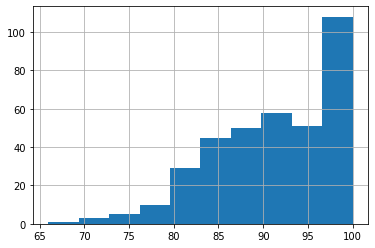

In [150]:
df['occupancy_perc'].hist()

In [153]:
df_low_occupancy = df[df['occupancy_perc'] < 80]

In [154]:
# рейсы с заполняемостью менее 80%
df_low_occupancy

,flight_id,flight_no,flight_no_2,departure_city,arrival_city,actual_departure,actual_arrival,scheduled_flight_duration_minutes,model,occupancy_max,occupancy_actual,revenue_actual,distance,occupancy_perc,fuel_cons,fuel_cons_rub,profit
14,136306,PG0252,PG025,Anapa,Moscow,2016-12-04 10:10:00,2016-12-04 11:50:00,100,Boeing 737-300,130,102,1443200.00,1219.87,78.46,4.00,191768.00,1251432.00
28,136418,PG0252,PG025,Anapa,Moscow,2016-12-07 10:07:00,2016-12-07 11:47:00,100,Boeing 737-300,130,97,1407800.00,1219.87,74.62,4.00,191768.00,1216032.00
32,136491,PG0252,PG025,Anapa,Moscow,2016-12-08 10:08:00,2016-12-08 11:49:00,100,Boeing 737-300,130,103,1505400.00,1219.87,79.23,4.00,191768.00,1313632.00
40,136352,PG0252,PG025,Anapa,Moscow,2016-12-10 10:10:00,2016-12-10 11:50:00,100,Boeing 737-300,130,92,1372400.00,1219.87,70.77,4.00,191768.00,1180632.00
71,41321,PG0251,PG025,Moscow,Anapa,2016-12-17 15:09:00,2016-12-17 16:48:00,100,Boeing 737-300,130,102,1468800.00,1219.87,78.46,4.00,176894.40,1291905.60
84,136252,PG0252,PG025,Anapa,Moscow,2016-12-20 10:05:00,2016-12-20 11:46:00,100,Boeing 737-300,130,102,1517600.00,1219.87,78.46,4.00,191768.00,1325832.00
93,41358,PG0251,PG025,Moscow,Anapa,2016-12-22 15:08:00,2016-12-22 16:48:00,100,Boeing 737-300,130,103,1457800.00,1219.87,79.23,4.00,176894.40,1280905.60
100,136253,PG0252,PG025,Anapa,Moscow,2016-12-24 10:08:00,2016-12-24 11:46:00,100,Boeing 737-300,130,93,1407800.00,1219.87,71.54,4.00,191768.00,1216032.00
152,136202,PG0252,PG025,Anapa,Moscow,2017-01-05 10:07:00,2017-01-05 11:49:00,100,Boeing 737-300,130,100,1495600.00,1219.87,76.92,4.00,191768.00,1303832.00
164,136122,PG0252,PG025,Anapa,Moscow,2017-01-08 10:08:00,2017-01-08 11:48:00,100,Boeing 737-300,130,97,1431000.00,1219.87,74.62,4.00,191768.00,1239232.00
